(0.9608399356220566,
 1.4891270040868576,
 0.24921873466962313,
 0.818468734669623)

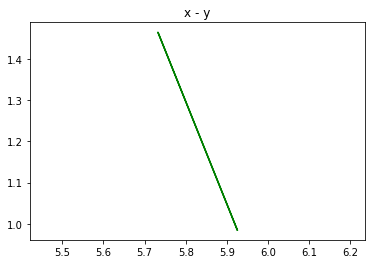

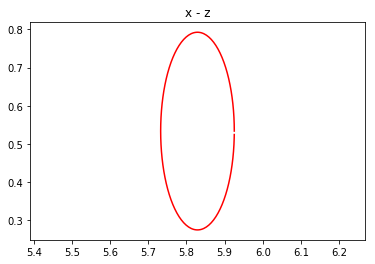

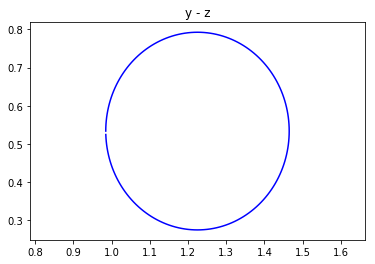

In [16]:
import math
import numpy as np
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt




def tan_deg( tan ):
    tan_in_degree = math.radians(tan)
    return math.tan(tan_in_degree)

def sin_deg( sin ):
    sin_in_degree = math.radians(sin)
    return math.sin(sin_in_degree)

def cos_deg( cos ):
    cos_in_degree = math.radians(cos)
    return math.cos(cos_in_degree)

def atan_deg(atan): 
    atan_rad = math.atan(atan)
    return math.degrees(atan_rad)

def vec_add (vec1 , vec2):
    a0 = vec1[0] + vec2[0]
    a1 = vec1[1] + vec2[1]
    a2 = vec1[2] + vec2[2]
    return (a0 , a1 , a2)

def polar_to_cartesian( r , theta):
    y = 0 ;
    x = r * cos_deg(theta)
    z = r * sin_deg(theta)
    return (x , y , z)

def inner(vec1 , vec2): 
    return vec1[0]*vec2[0] + vec1[1]*vec2[1] + vec1[2]*vec2[2]
def vec_abs (vec):
    sq = vec[0]*vec[0] + vec[1]*vec[1] + vec[2]*vec[2]
    return math.sqrt(sq)
def normal (vec): 
    mag = vec_abs(vec)
    return (vec[0]/mag , vec[1]/mag , vec[2]/mag)


resx = np.array([])
resy = np.array([])
resz = np.array([])


    

#A = -80.4493
#B = 5.2082
A = -78.1314
B = 5.1217

rpm = 12 
omega = 6 * rpm

tilt = 0
yaw = 10 

r = 0.345 * 0.75 
distance_to_nose = 5.98
#in order to be consistent with tracking code
aprime = 90 + A 
t = 90 - tilt
#############################################
#CALCULATING NOSE VECTORS 

x_nose = distance_to_nose * cos_deg(B) * sin_deg(-A)
y_nose = distance_to_nose * cos_deg(B) * cos_deg(-A)
z_nose = distance_to_nose * sin_deg(B)

#############################################
for theta in range(0,360,2):
    resx = np.append(resx , [x_nose + r*sin_deg(theta)*cos_deg(t)*cos_deg(aprime+yaw) + r*cos_deg(theta)*cos_deg(aprime+yaw-90)])
    resy = np.append(resy , [y_nose + r*sin_deg(theta)*cos_deg(t)*sin_deg(aprime+yaw) + r*cos_deg(theta)*sin_deg(aprime+yaw-90)])
    resz = np.append(resz , [z_nose + r*sin_deg(theta)*sin_deg(t)])
    

#resx = -resx
#ax.plot3D(resx, resy, resz, 'gray')

plt.plot(resx,resy,'green') # x - y
plt.title('x - y')
plt.axis('equal')
plt.figure()
plt.plot(resx,resz , 'red') # x - z
plt.title('x - z')
plt.axis('equal')
plt.figure()
plt.plot(resy,resz , 'blue')# y - z
plt.title('y - z')
plt.axis('equal')


In [17]:
#set theta to an arbitrary point 
theta = 0 

x = x_nose - r * cos_deg(theta) * cos_deg(yaw + A) + r * sin_deg(theta) * sin_deg(t) * sin_deg(A - yaw)
y = y_nose - r * cos_deg(theta) * sin_deg(yaw + A) + r * sin_deg(theta) * sin_deg(t) * cos_deg(A - yaw)
z = z_nose + r * sin_deg(theta) * cos_deg(t)

xdot = r * omega * (sin_deg(theta)*cos_deg(yaw + A) + cos_deg(theta)*sin_deg(t)*sin_deg(A-yaw))
ydot = r * omega * (sin_deg(theta)*sin_deg(yaw + A) + cos_deg(theta)*sin_deg(t)*cos_deg(A-yaw))
zdot = r * omega * cos_deg(theta) * cos_deg(t)

b = atan_deg ( z / math.sqrt(x**2 + y**2))

bdot = (2*z*zdot*(x**2 + y**2) - z**2 * (2*x*xdot + 2*y*ydot))/((x**2 ))


print(bdot)


1.8359722594151335
